In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline

In [16]:
from trackml.dataset import load_event, load_dataset
from trackml.randomize import shuffle_hits
from trackml.score import score_event

In [17]:
# One event of 8850
event_id = 'event000001099'
# "All methods either take or return pandas.DataFrame objects"
hits, cells, particles, truth = load_event('..\\train_sample\\train_100_events\\' +event_id)

In [18]:
hits.head()

hit_id          x          y       z  volume_id  layer_id  module_id
0       1 -57.160500  -5.576950 -1502.5          7         2          1
1       2 -63.898899   0.462975 -1502.5          7         2          1
2       3 -77.938400  -3.249990 -1502.5          7         2          1
3       4 -78.778900 -12.644900 -1502.5          7         2          1
4       5 -85.180298  -3.970410 -1502.5          7         2          1

In [19]:
hits.tail()

hit_id           x           y       z  volume_id  layer_id  module_id
117429  117430 -765.413025   27.920200  2944.5         18        12         97
117430  117431 -812.530029  104.125000  2944.5         18        12         97
117431  117432 -946.745972  119.803001  2952.5         18        12         98
117432  117433 -957.260986  118.300003  2952.5         18        12         98
117433  117434 -950.388977   61.897499  2952.5         18        12         98

In [20]:
hits.describe()

hit_id              x              y              z  \
count  117434.000000  117434.000000  117434.000000  117434.000000   
mean    58717.500000       3.984669      -0.271223     -18.660763   
std     33900.420093     307.368164     306.944824    1067.352905   
min         1.000000   -1024.969971   -1024.849976   -2955.500000   
25%     29359.250000     -96.139448    -100.794752    -694.000000   
50%     58717.500000       2.327375       0.772793     -10.132050   
75%     88075.750000     104.955751     100.650249     609.934265   
max    117434.000000    1025.310059    1025.260010    2955.500000   

           volume_id       layer_id      module_id  
count  117434.000000  117434.000000  117434.000000  
mean       10.939532       5.921181     372.253232  
std         3.373617       3.401974     528.927205  
min         7.000000       2.000000       1.000000  
25%         8.000000       4.000000      60.000000  
50%         9.000000       6.000000     120.000000  
75%        13.000000       8.000000     486.000000  
max        18.000000      14.000000    3191.000000

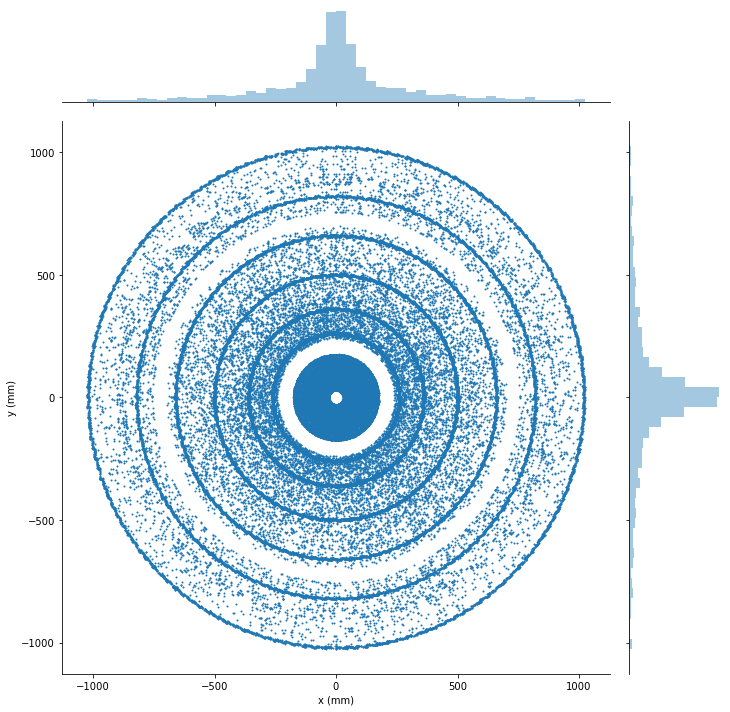

In [21]:
#plt.figure(figsize=(10,10))
#plt.scatter(hits.x,hits.y, s=1)
#plt.show()
# Essentially the same plot as above but includes univariate plots and Pearson corr coeff
radialview = sns.jointplot(hits.x, hits.y, height=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

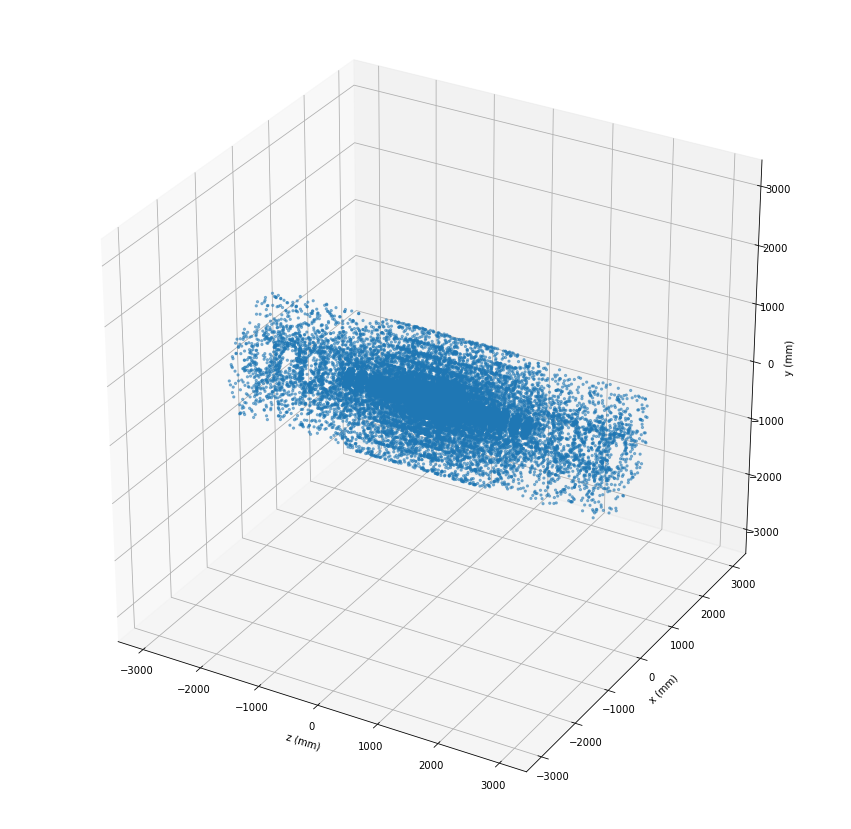

In [22]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
sample = hits.sample(30000)
ax.scatter(sample.z, sample.x, sample.y, s=5, alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()

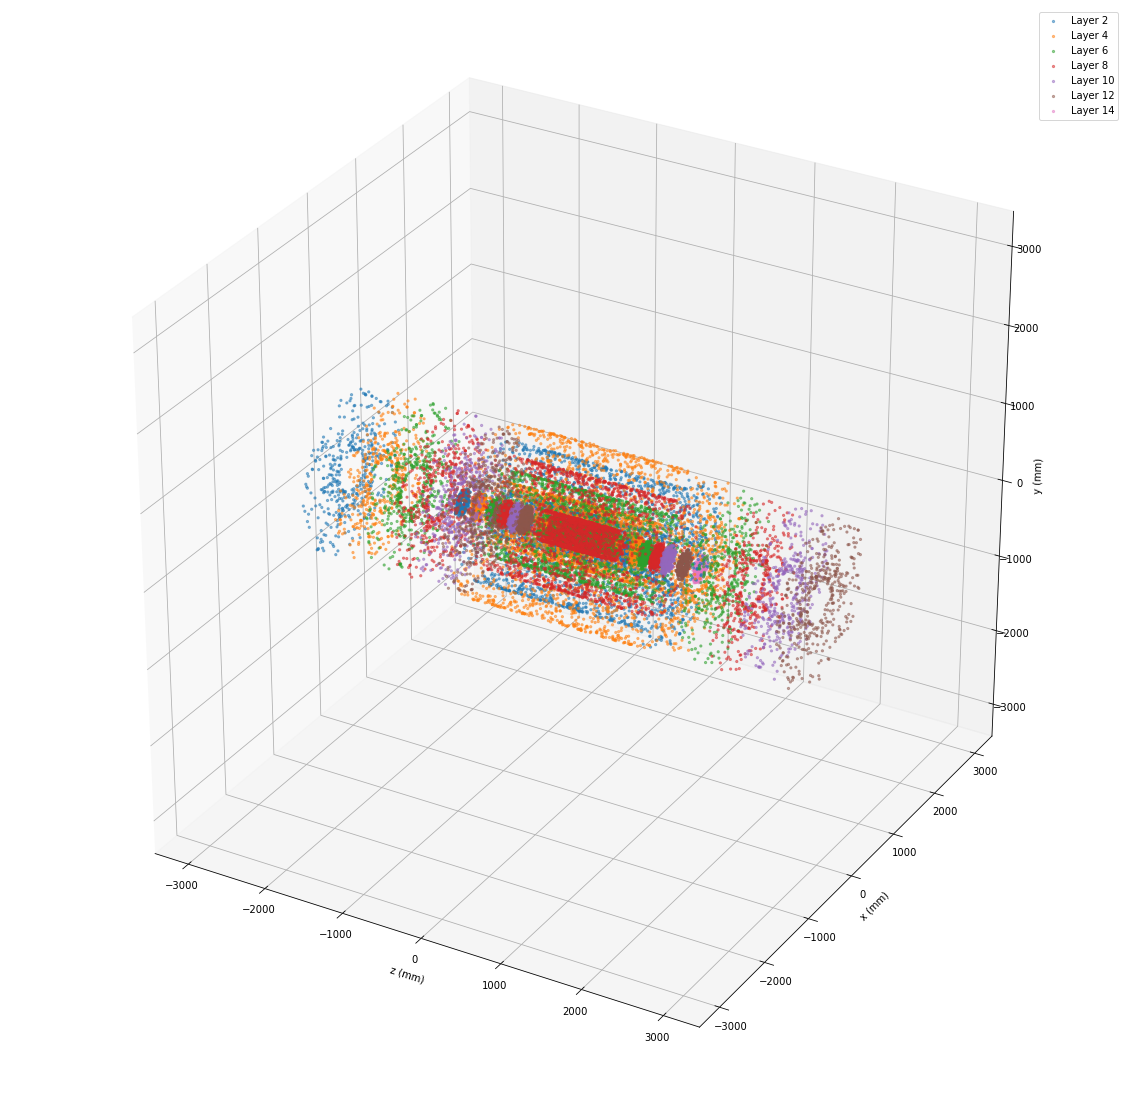

In [23]:
layers = hits.layer_id.unique()

plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
for layer in layers:
    l = sample[sample.layer_id == layer]
    ax.scatter(l.z, l.x, l.y, s=5, label='Layer '+str(layer), alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
ax.legend()
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()

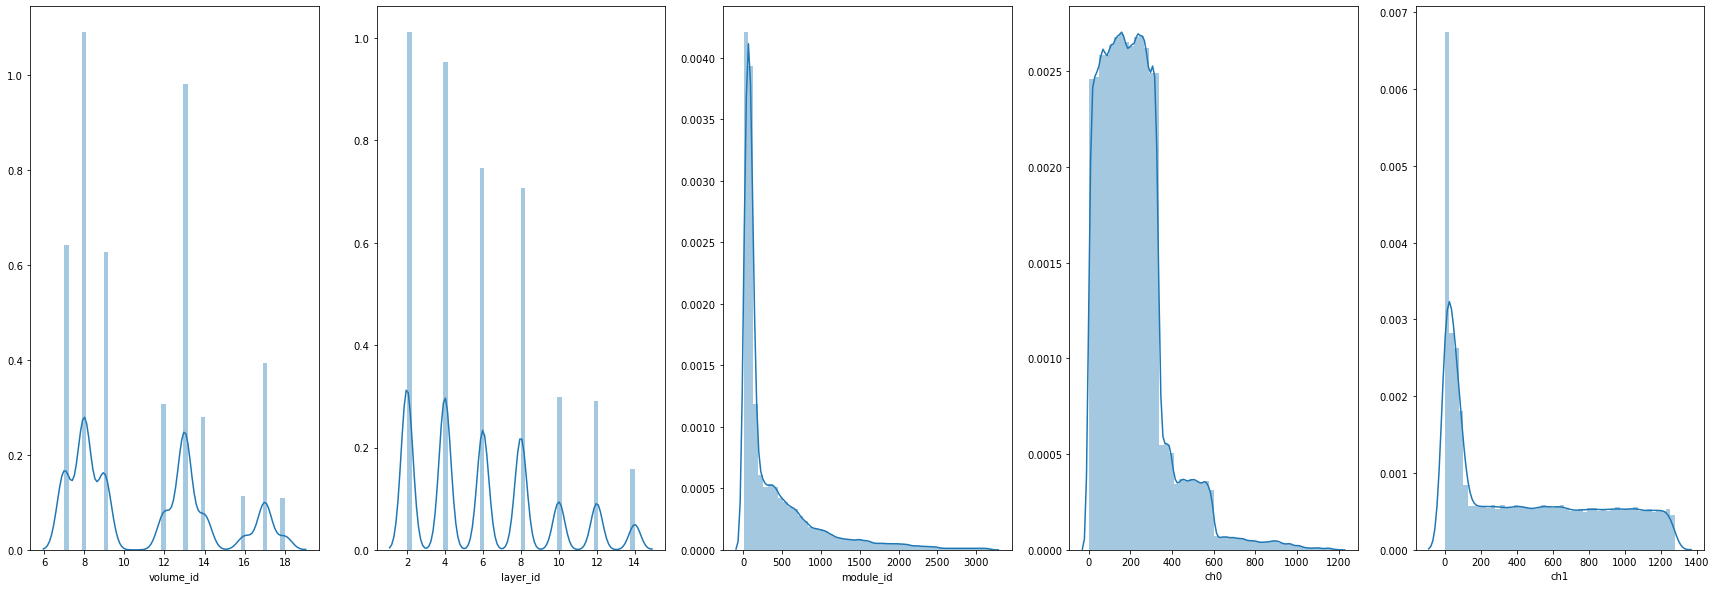

In [24]:
plt.figure(figsize=(30,10))
plt.subplot(1,5,1)
sns.distplot(hits.volume_id)
plt.subplot(1,5,2)
sns.distplot(hits.layer_id)
plt.subplot(1,5,3)
sns.distplot(hits.module_id)
plt.subplot(1,5,4)
sns.distplot(cells.ch0)
plt.subplot(1,5,5)
sns.distplot(cells.ch1)
plt.show()

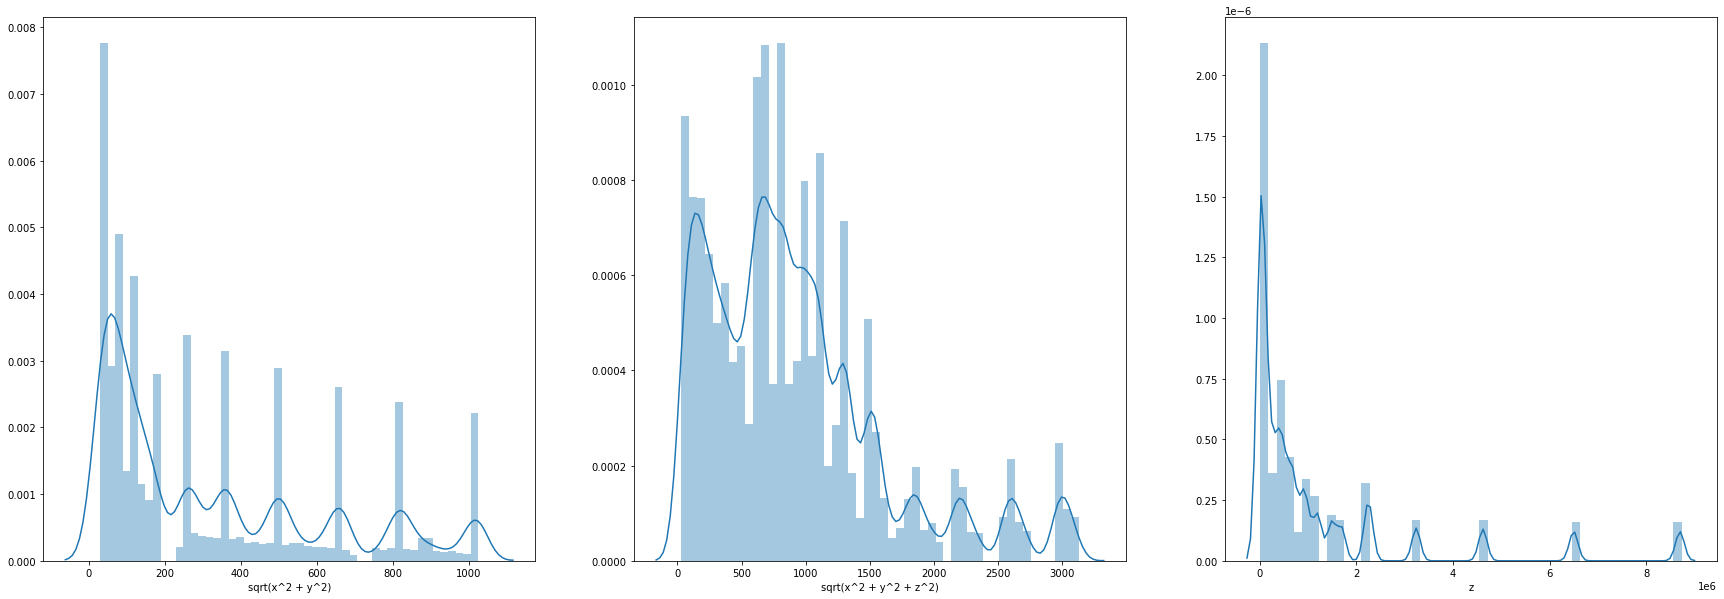

In [25]:
plt.figure(figsize=(30,10))
radius2 = np.sqrt(hits.x**2 + hits.y**2)
plt.subplot(1,3,1)
sns.distplot(radius2, axlabel='sqrt(x^2 + y^2)')
plt.subplot(1,3,2)
radius3 = np.sqrt(hits.x**2 + hits.y**2 + hits.z**2)
sns.distplot(radius3, axlabel='sqrt(x^2 + y^2 + z^2)')
plt.subplot(1,3,3)
sns.distplot(hits.z**2, axlabel='z')
plt.show()

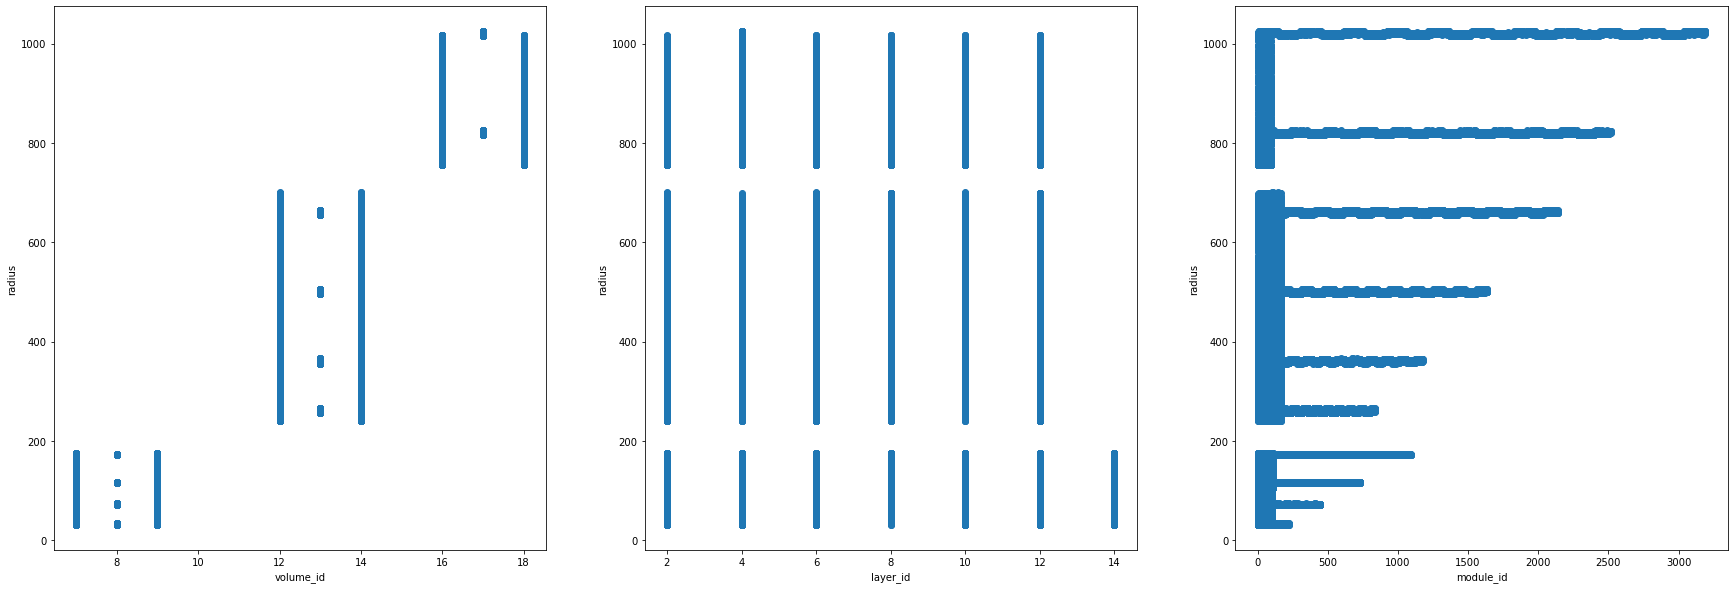

In [26]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.scatter(hits.volume_id, radius2)
plt.xlabel('volume_id')
plt.ylabel('radius')
plt.subplot(1,3,2)
plt.scatter(hits.layer_id, radius2)
plt.xlabel('layer_id')
plt.ylabel('radius')
plt.subplot(1,3,3)
plt.scatter(hits.module_id, radius2)
plt.xlabel('module_id')
plt.ylabel('radius')
plt.show()

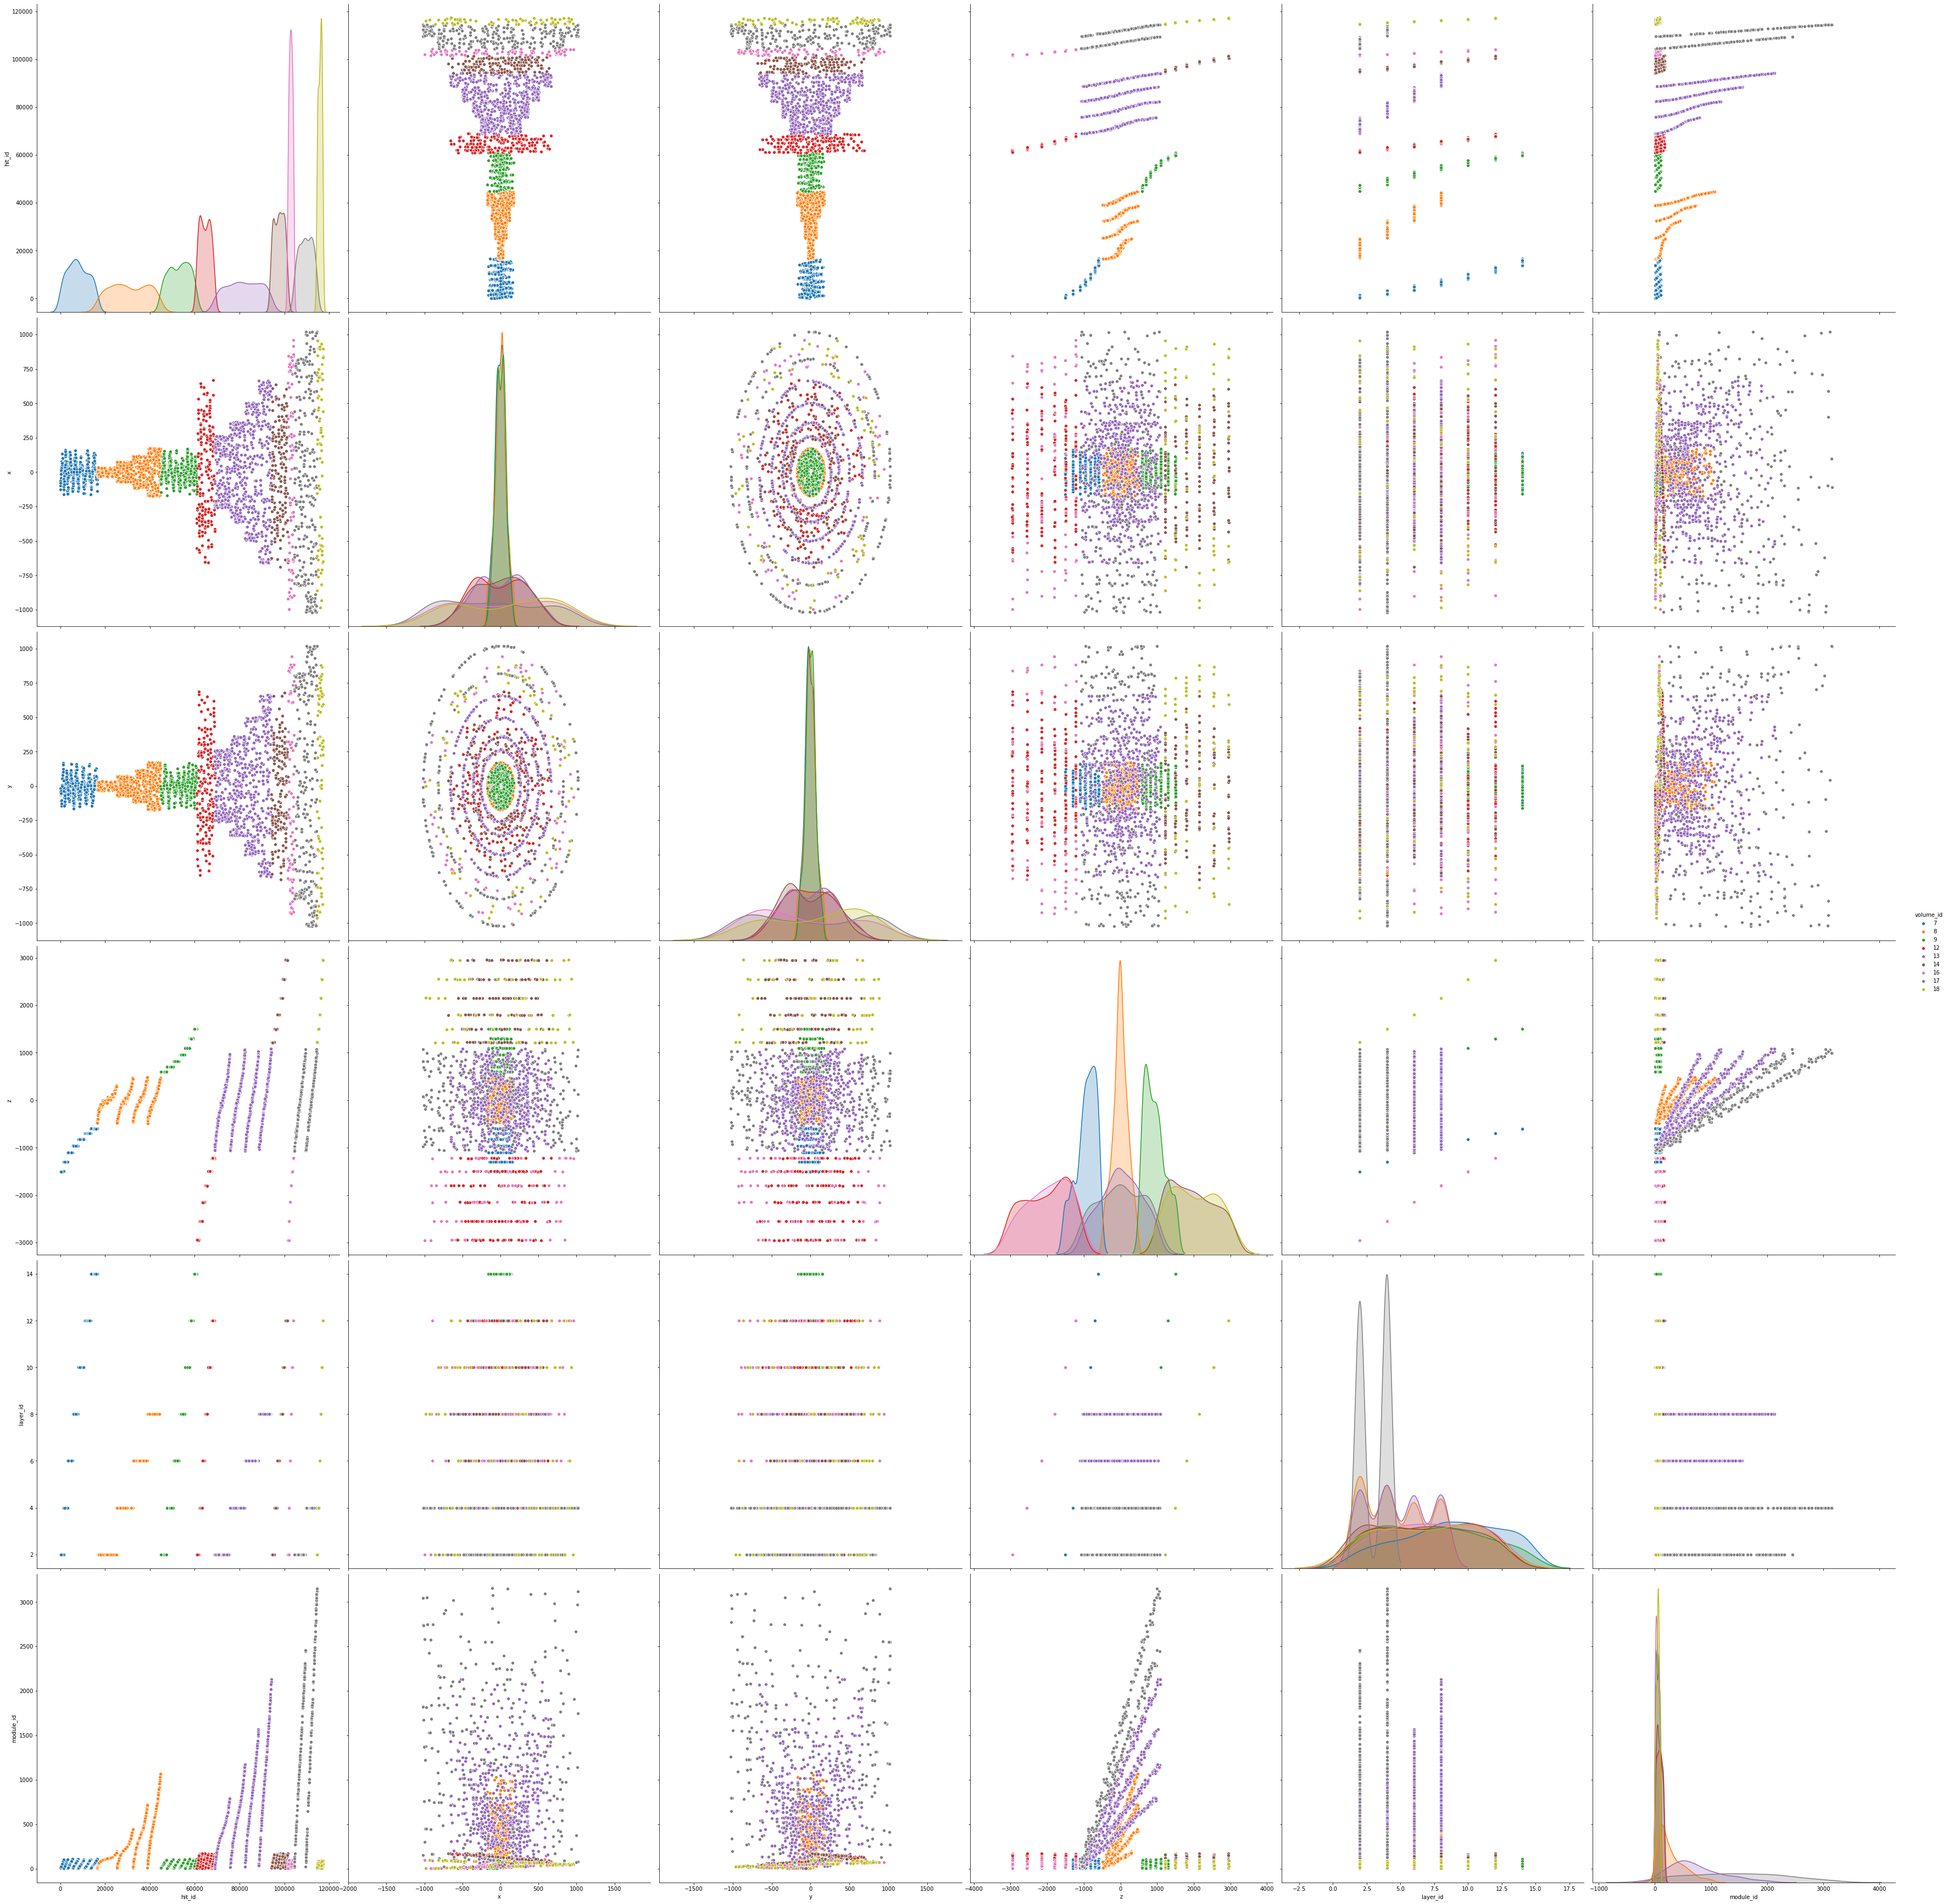

In [27]:
# Pairplotting 120k hits takes too long, so let's look at a random sampling
#sample = hits.drop('hit_id', axis=1).sample(3000)
sample = hits.sample(3000)
# I've also decided to color-code them by group again. Makes sense to me.
sns.pairplot(sample, hue='volume_id', height=8)
plt.show()

In [28]:
cells.head()

hit_id  ch0  ch1     value
0       1  189  487  0.314753
1       2   58  598  0.313998
2       3  110  852  0.261836
3       4  296  880  0.318260
4       5  113  982  0.094810

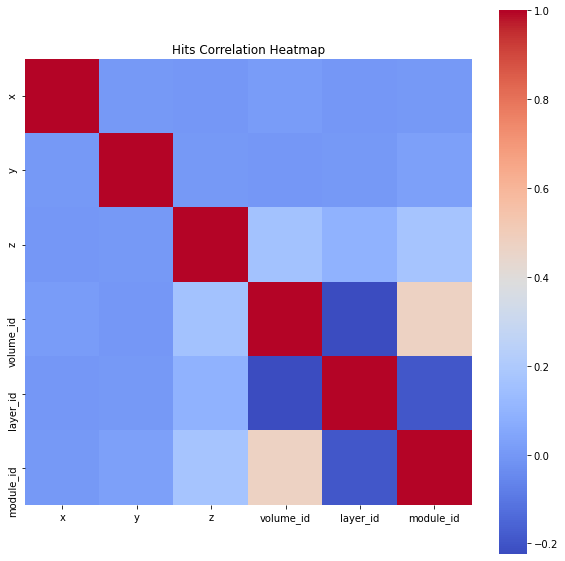

In [29]:
plt.figure(figsize=(10, 10))
hitscorr = hits.drop('hit_id', axis=1).corr()
sns.heatmap(hitscorr, cmap='coolwarm', square=True)
plt.title('Hits Correlation Heatmap')
plt.show()

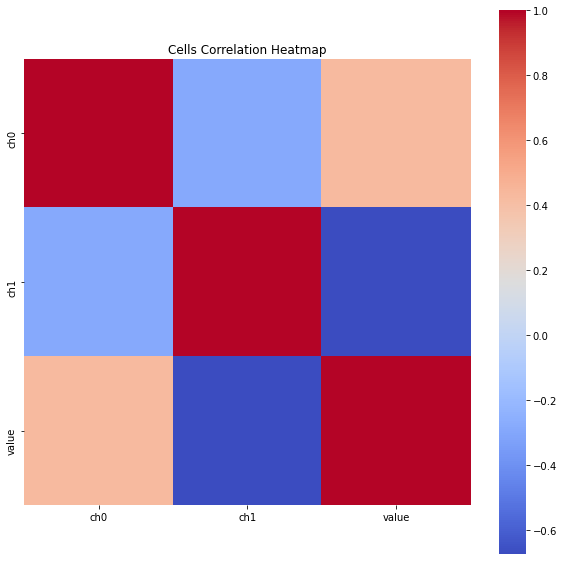

In [30]:
plt.figure(figsize=(10, 10))
cellscorr = cells.drop('hit_id', axis=1).corr()
sns.heatmap(cellscorr, cmap='coolwarm', square=True)
plt.title('Cells Correlation Heatmap')
plt.show()

In [31]:
nhits0 = particles[particles.nhits ==0]
nhits0_2 = nhits0[nhits0.particle_id == 4503805785800704]
nhits0[['px','py','pz']].describe()

px           py           pz
count  1501.000000  1501.000000  1501.000000
mean     -0.002318    -0.010893     0.131962
std       0.206251     0.236239     3.496211
min      -1.641350    -2.527400   -30.888201
25%      -0.103445    -0.105266    -0.189466
50%      -0.002386     0.009833    -0.002901
75%       0.102279     0.102479     0.172864
max       1.155190     1.716100    43.875000

In [32]:
pt_mean = np.mean(np.sqrt(particles.px**2 + particles.py**2))
pt_mean_unc = np.std(np.sqrt(particles.px**2 + particles.py**2))
pt0_mean = np.mean(np.sqrt(nhits0.px**2 + nhits0.py**2))
pt0_mean_unc = np.std(np.sqrt(nhits0.px**2 + nhits0.py**2))
print('Mean transverse momentum:')
print('    full:', pt_mean, ' +-', pt_mean_unc, 'GeV/c')
print(' nhits=0:', pt0_mean, '+-', pt0_mean_unc)

Mean transverse momentum:
    full: 0.5327783226966858  +- 0.6970236897468567 GeV/c
 nhits=0: 0.21954679489135742 +- 0.22406640648841858


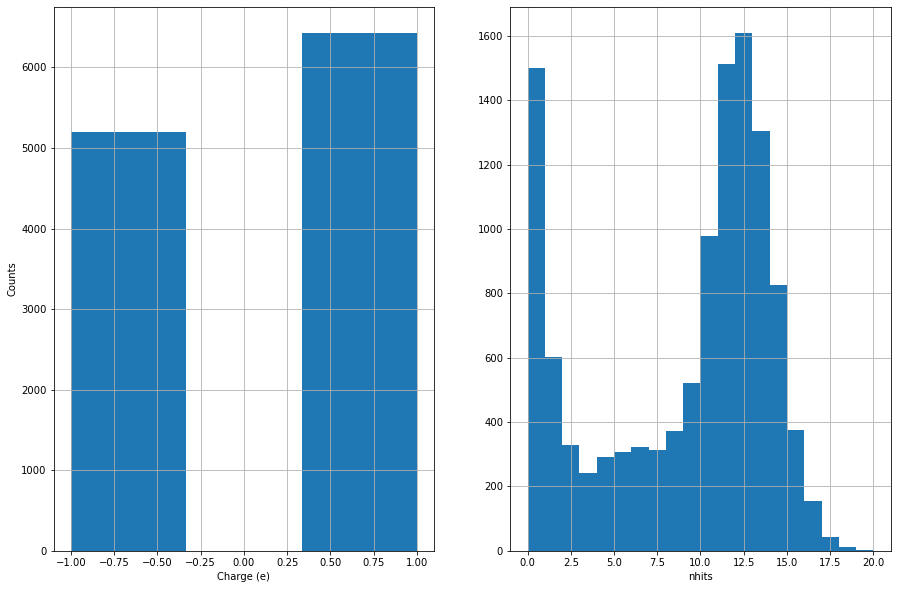

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
particles.q.hist(bins=3)
plt.xlabel('Charge (e)')
plt.ylabel('Counts')
plt.subplot(1,2,2)
particles.nhits.hist(bins=particles.nhits.max())
plt.xlabel('nhits')
plt.show()

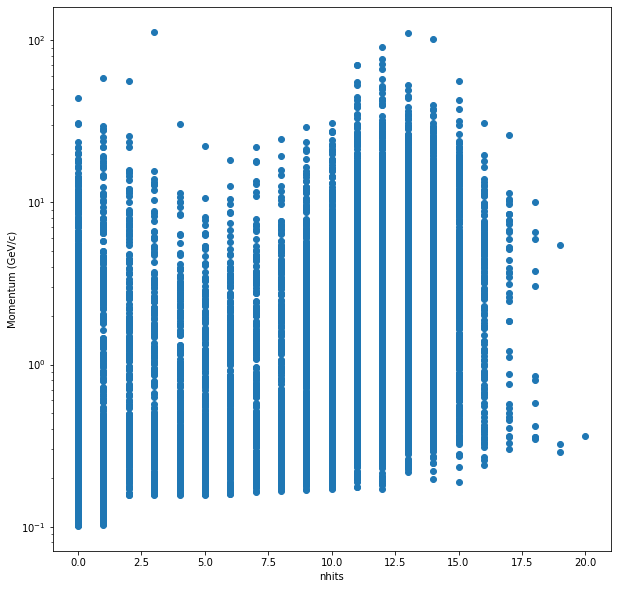

In [34]:
plt.figure(figsize=(10,10))
p = np.sqrt(particles.px**2 + particles.py**2 + particles.pz**2)
plt.scatter(particles.nhits, p)
plt.yscale('log')
plt.xlabel('nhits')
plt.ylabel('Momentum (GeV/c)')
plt.show()

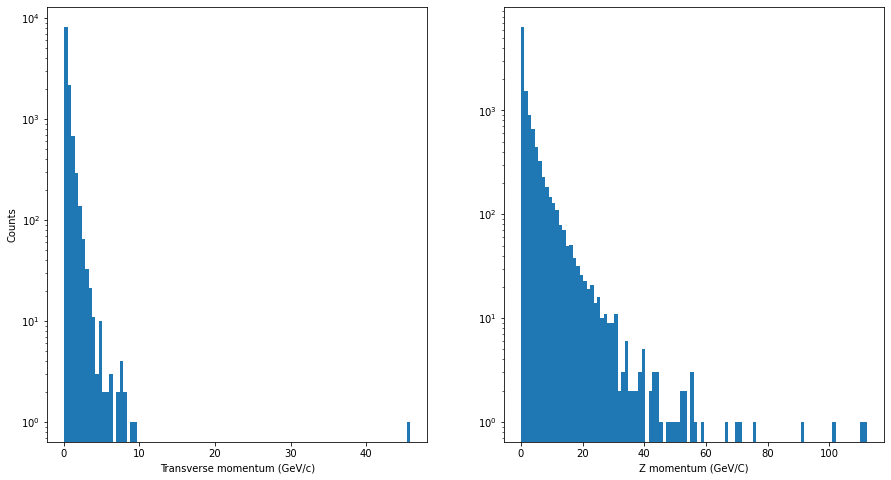

In [35]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
#plt.xscale('log')
plt.hist(np.sqrt(particles.px**2 + particles.py**2), bins=100, log=True)
plt.xlabel('Transverse momentum (GeV/c)')
plt.ylabel('Counts')
plt.subplot(1,2,2)
#plt.xscale('log')
plt.hist(particles.pz.abs(), bins=100, log=True)
plt.xlabel('Z momentum (GeV/C)')
plt.show()

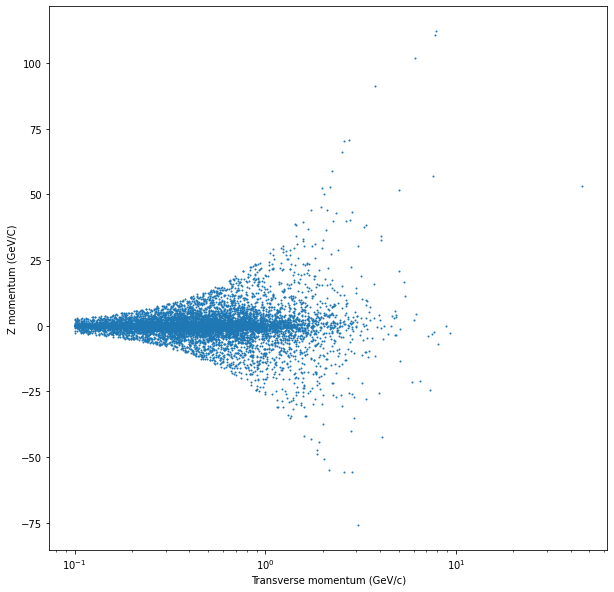

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(np.sqrt(particles.px**2 + particles.py**2), particles.pz, s=1)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Transverse momentum (GeV/c)')
plt.ylabel('Z momentum (GeV/C)')
#plt.zlabel('Counts')
plt.show()

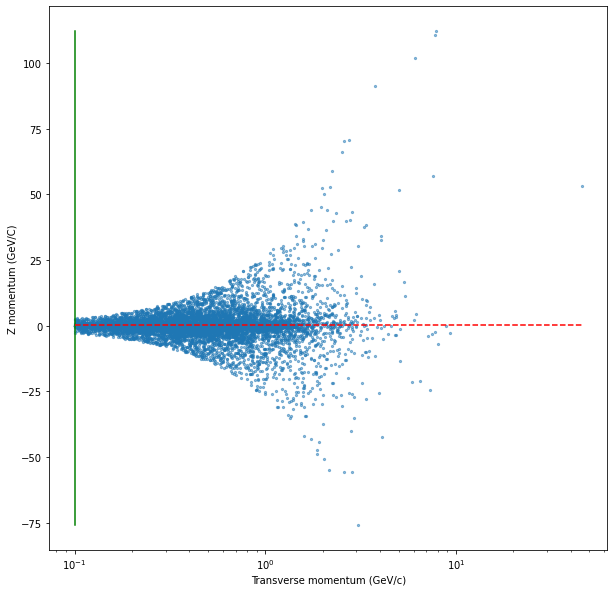

In [37]:
p = particles[particles.pz < 200]

plt.figure(figsize=(10,10))
plt.scatter(np.sqrt(p.px**2 + p.py**2), p.pz, s=5, alpha=0.5)
plt.plot([0.1,0.1],[p.pz.min(),p.pz.max()], c='g') # 0.1 instead of 0 because log plot.
plt.plot([0.1,np.sqrt(p.px**2 + p.py**2).max()],[0.1,0.1], c='r', linestyle='--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Transverse momentum (GeV/c)')
plt.ylabel('Z momentum (GeV/C)')
plt.show()

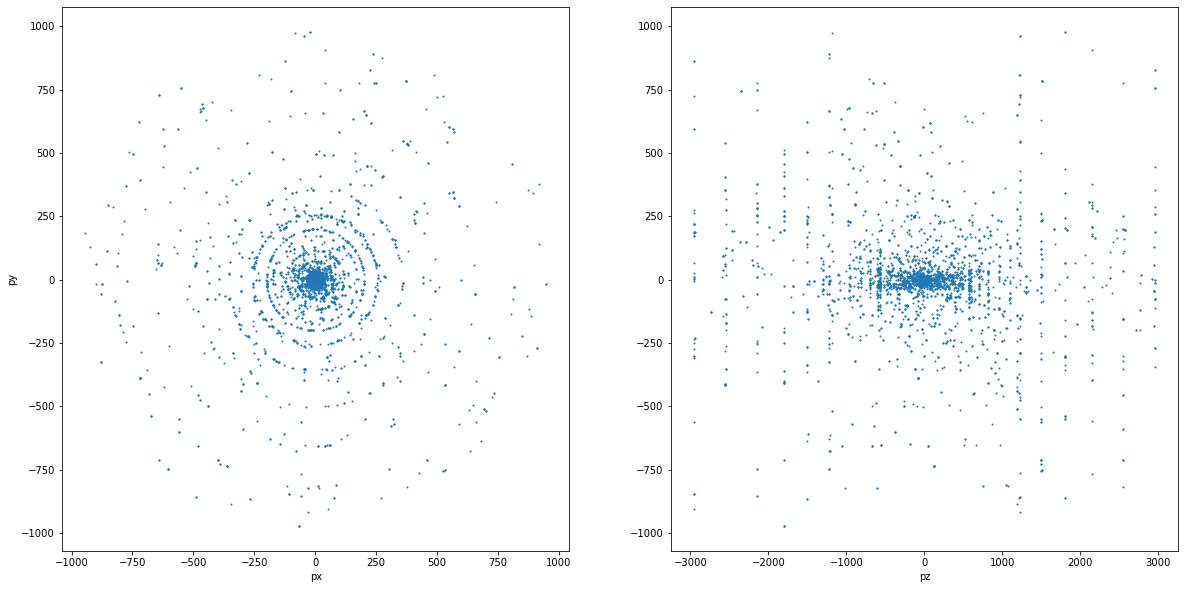

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(particles.vx, particles.vy, s=1)
plt.xlabel('px')
plt.ylabel('py')
plt.subplot(1,2,2)
plt.scatter(particles.vz, particles.vy, s=1)
plt.xlabel('pz')
plt.show()

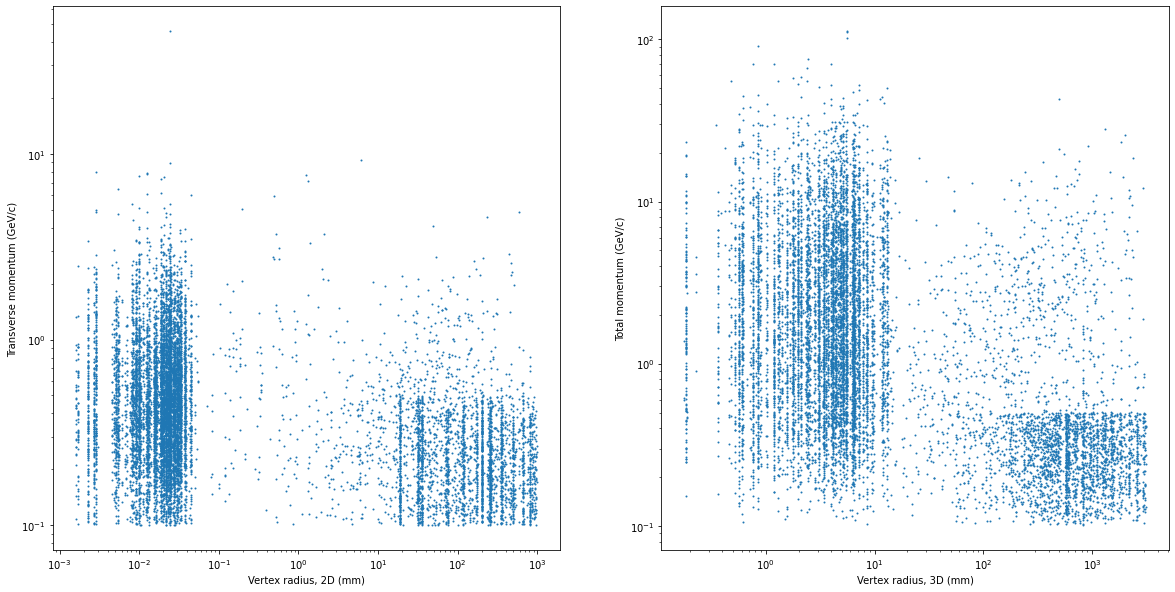

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(np.sqrt(particles.vx**2+particles.vy**2), np.sqrt(particles.px**2+particles.py**2), s=1)
plt.xlabel('Vertex radius, 2D (mm)')
plt.ylabel('Transverse momentum (GeV/c)')
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.scatter(np.sqrt(particles.vx**2+particles.vy**2+particles.vz**2), np.sqrt(particles.px**2+particles.py**2+particles.pz**2), s=1)
plt.xlabel('Vertex radius, 3D (mm)')
plt.ylabel('Total momentum (GeV/c)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [40]:
len(particles), len(particles.particle_id.unique())

(11620, 11620)

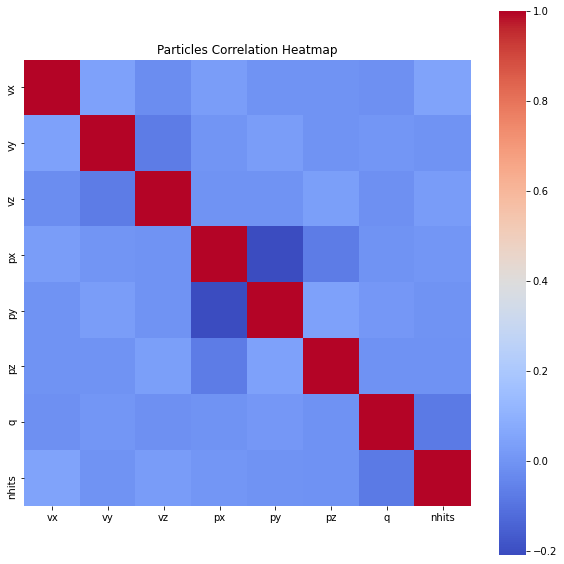

In [41]:
plt.figure(figsize=(10, 10))
particlescorr = particles.drop('particle_id', axis=1).corr()
sns.heatmap(particlescorr, cmap='coolwarm', square=True)
plt.title('Particles Correlation Heatmap')
plt.show()

In [42]:
truth.head()

hit_id         particle_id         tx         ty      tz       tpx  \
0       1  490907752546172928 -57.152500  -5.554470 -1502.5 -0.188425   
1       2  824161068271009792 -63.921799   0.478747 -1502.5 -0.489301   
2       3  342275976861843456 -77.935303  -3.272010 -1502.5 -0.511210   
3       4  198161338541801472 -78.796898 -12.664200 -1502.5 -0.487352   
4       5  459369223576092672 -85.186302  -3.959050 -1502.5 -0.417376   

        tpy       tpz    weight  
0 -0.036210  -5.18738  0.000007  
1  0.015332 -11.34570  0.000009  
2 -0.041017  -9.99011  0.000006  
3 -0.100570  -9.48173  0.000006  
4 -0.047440  -7.43702  0.000007

In [43]:
# Number of unique particles
len(truth.particle_id.unique())

10120

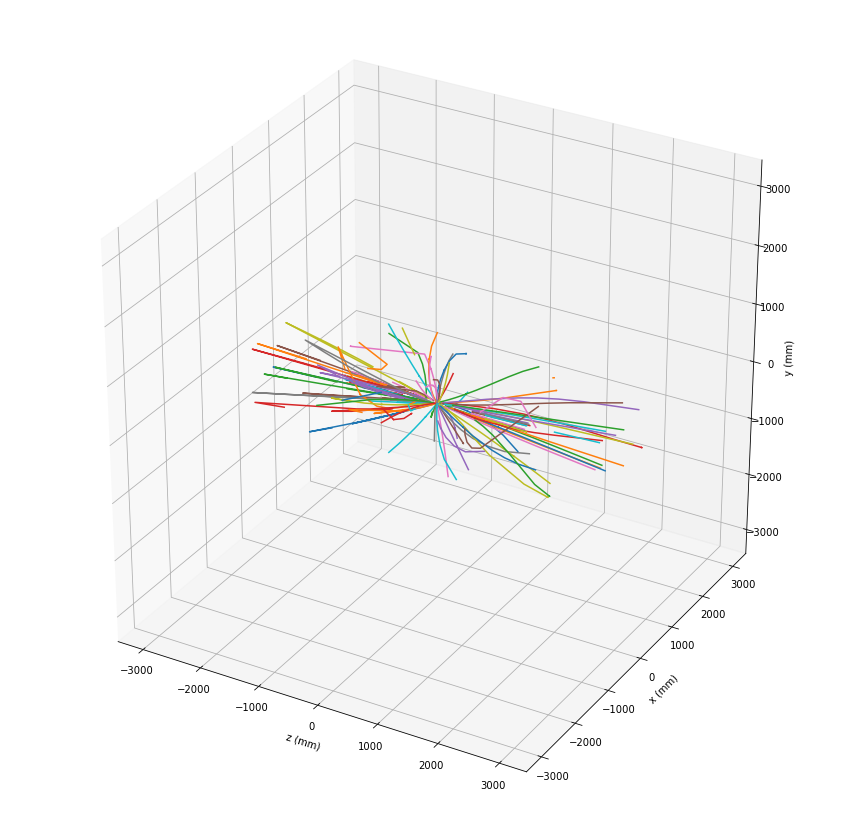

In [44]:
# Get every 100th particle
tracks = truth.particle_id.unique()[1::100]

plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
for track in tracks:
    t = truth[truth.particle_id == track]
    ax.plot3D(t.tz, t.tx, t.ty)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()